In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 100
plt.style.use("bmh")

In [3]:
os.chdir("..")

In [4]:
df = pd.read_csv("data/precleaned.csv", index_col=0)

In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head()

,wiek,zawod,stan_cywilny,wyksztalcenie,ma_kredyt,kredyt_mieszkaniowy,ma_pozyczke,sposob_kontaktu,miesiac,day_of_week,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wynik_poprzedniej_kampanii,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Quickstart
1. [Import danych](#Import-danych-i-podstawowe-informacje-o-zbiorze)
2. [Wykresy](#Wykresy-i-wnioski-przyblizajace-zbior-danych)
3. [Potencjalne pytania](#Pytania,-ktore-moga-potencjalnie-naprowadzic-na-cechy,-ktore-maja-wieksze-znaczenie-dla-predykcji-targetu)
4. [Key takeaways](#Key-takeaways)

# Detekcja wartosci odstajacych

In [7]:
df.describe()

,wiek,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## Cechy numeryczne

In [8]:
subset = df.select_dtypes(exclude="object")

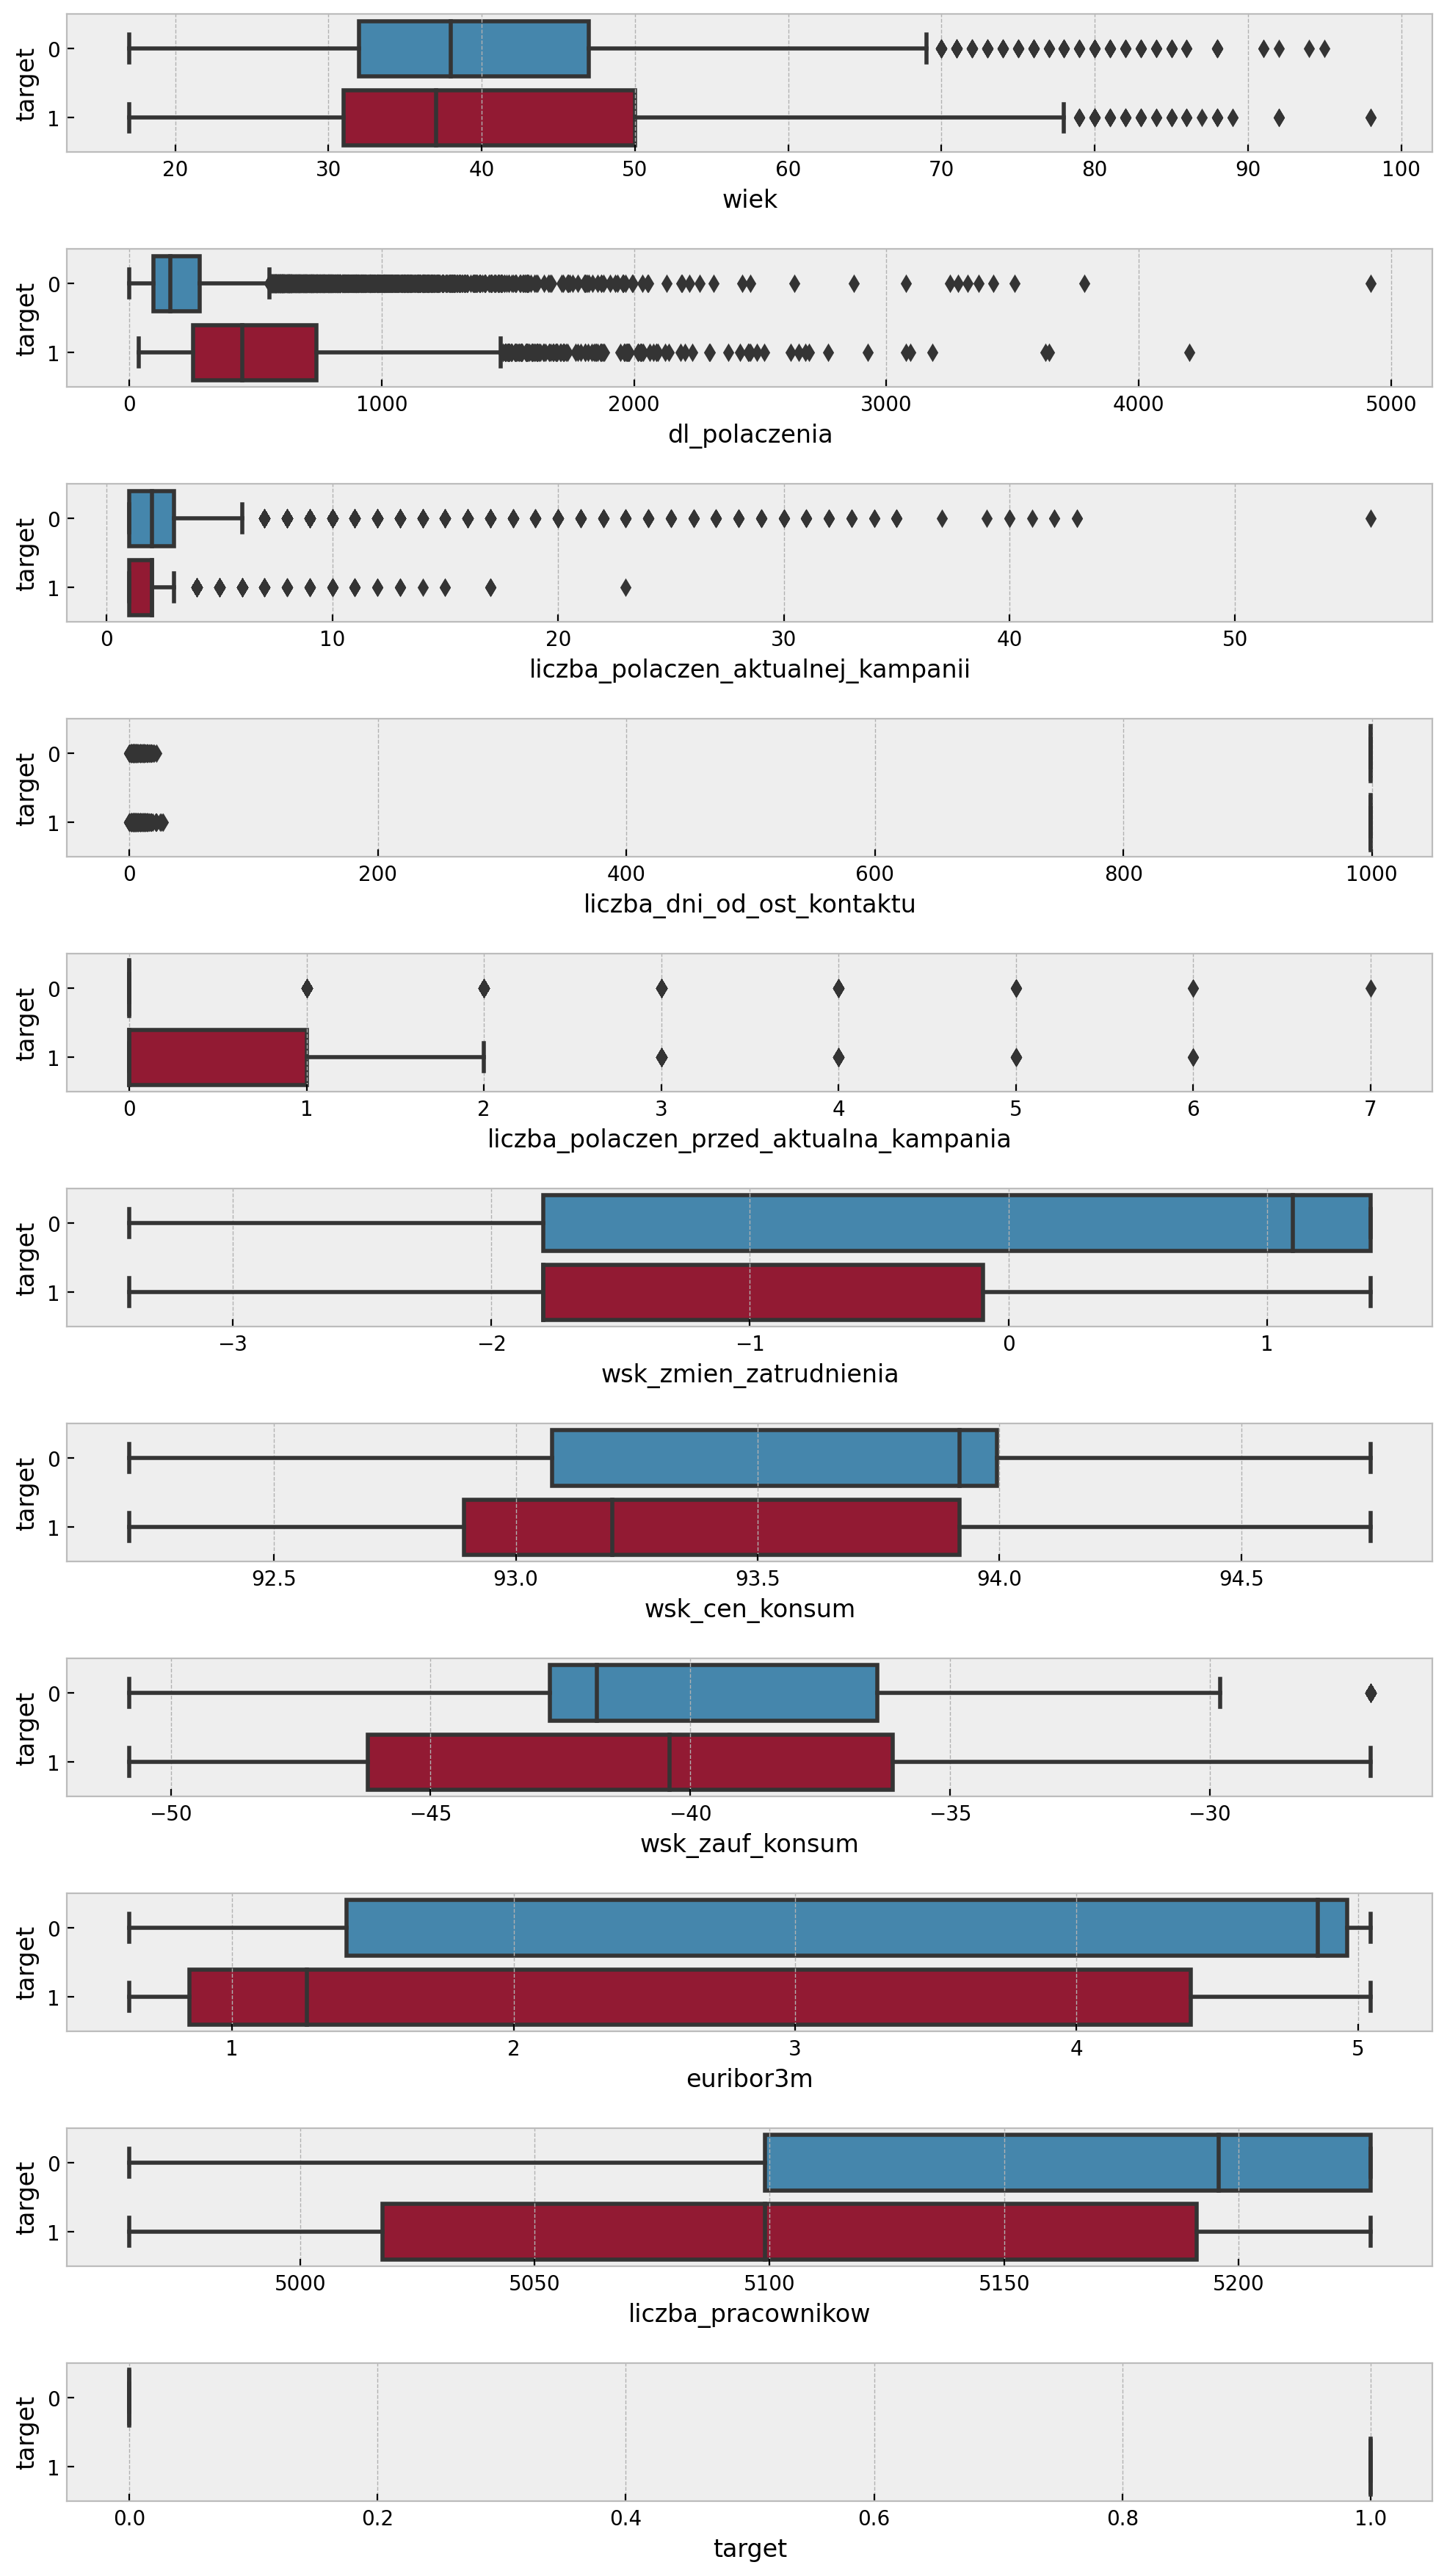

In [9]:
fig, axs = plt.subplots(len(subset.columns), dpi=200, figsize=(12, 22))

for ind, feature in enumerate(subset.columns):
    sns.boxplot(data=df, x=df[feature], y="target", ax=axs[ind], orient="h")

plt.subplots_adjust(hspace=0.7)

### Spostrzeżenia
- Głównym targetem kampanii są osoby w wieku między 30 a 50 rokiem życia
- Osoby, które nie były chętne skorzystać z oferty szybciej kończyły rozmowę
- Przeważnie klienci zgadzali się przystać na ofertę po maksymalnie kilku rozmowach, prowadzenei większej ilości rozmów nie spowodowało, że chętniej się zgadzali na ofertę
- Na ofertę częściej zgadzali się klienci z mniejsza liczą pracowników( około 5100)

### wiek

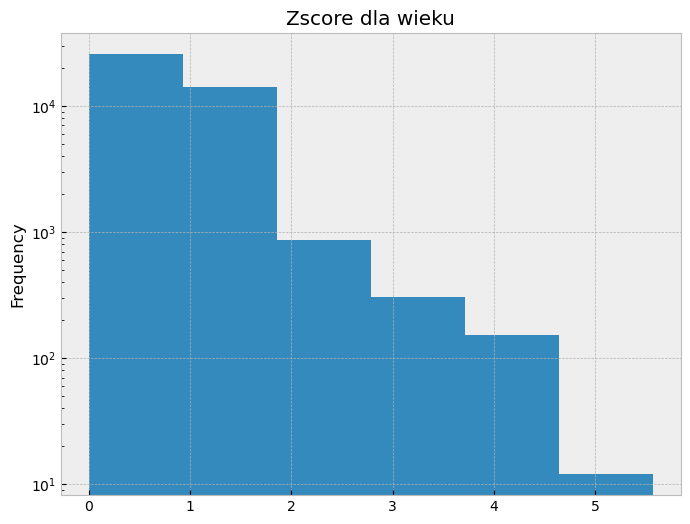

In [10]:
wiek_subset = np.abs(stats.zscore(df["wiek"]))
wiek_subset.plot(kind="hist", bins=6, logy=True, title="Zscore dla wieku");

In [11]:
threshold = 3
df = df.iloc[np.where(wiek_subset <= threshold)[0]]

### dl_polaczenia

<AxesSubplot:xlabel='dl_polaczenia', ylabel='Count'>

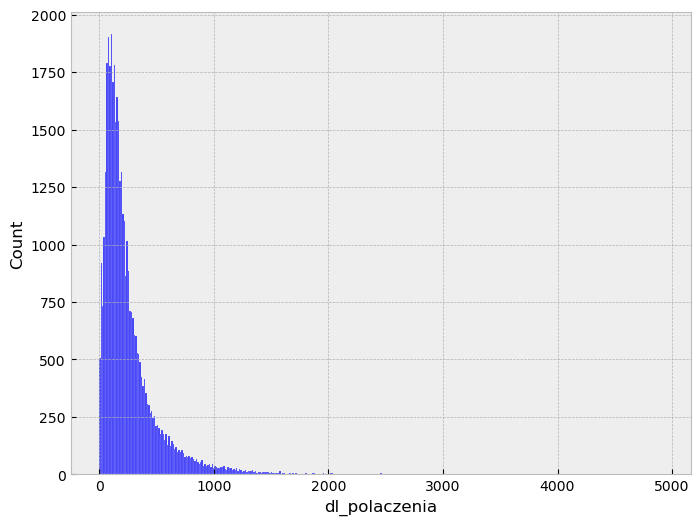

In [12]:
sns.histplot(data=df.dl_polaczenia)

### Spostrzeżenia
- Ustandaryzowano wiek klientów
- Sporo osób praktycznie natychmiastowo, bądź po usłyszeniu, że jest to oferta kończy rozmowę. Jest to częste zachowanie osób, które nie akceptują żadnych ofert proponowanych przez rozmowy telefoniczne. Na takie zachowanie nie ma wplywu żaden czynnik taki jak wykształcenie, zawód czy stan cywilny.

In [13]:
df[(df.dl_polaczenia <= 0)]

,wiek,zawod,stan_cywilny,wyksztalcenie,ma_kredyt,kredyt_mieszkaniowy,ma_pozyczke,sposob_kontaktu,miesiac,day_of_week,dl_polaczenia,liczba_polaczen_aktualnej_kampanii,liczba_dni_od_ost_kontaktu,liczba_polaczen_przed_aktualna_kampania,wynik_poprzedniej_kampanii,wsk_zmien_zatrudnienia,wsk_cen_konsum,wsk_zauf_konsum,euribor3m,liczba_pracownikow,target
6250,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
23024,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
28055,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,0
33005,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0


#### Nie nalezy porzucac tych obserwacji, gdyz sa naturalnym wynikiem rozlaczenia sie klienta z konsultantem

In [14]:
df = df[~(df.dl_polaczenia <= 0)]

In [15]:
subset = stats.boxcox(df["dl_polaczenia"])[0]

#### Sprawdzamy, czy _dl\_polaczenia_, po transformacji _box\_cox_ ma rozklad normalny.

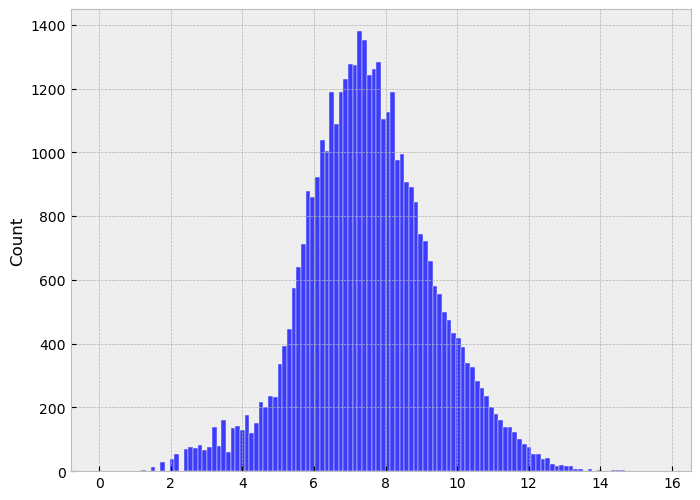

In [16]:
sns.histplot(data=subset);

In [17]:
df[df.dl_polaczenia > 2000].target.value_counts()

1    38
0    22
Name: target, dtype: int64

#### Dlugie rozmowy maja duze znaczenie dla modelu, bo mozna zauwazyc, ze im dluzsze sa rozmowy, tym wieksza szansa na to, ze osoba bedzie zainteresowana depozytem, wiec nie sa to tzw. wartosci odstajace.

#### Kolumna _dl\_polaczenia_ jest jedynie cecha pozwalajaca na walidacje modelu, wiec zostanie ona pominieta.

### liczba_polaczen_aktualnej_kampanii

In [18]:
pd.crosstab(index=df.liczba_polaczen_aktualnej_kampanii, columns=df.target).T

liczba_polaczen_aktualnej_kampanii,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,42,43,56
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,15241,9300,4752,2390,1477,899,589,381,263,212,165,122,88,68,49,50,54,33,26,30,24,17,15,15,8,8,11,8,10,7,7,4,4,3,5,1,1,2,1,2,2,1
1,2193,1166,558,244,117,73,35,16,17,12,12,3,4,1,2,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Na podstawie powyzszego zestawienia moznaby pokusic sie o porzucenie obserwacji, gdzie _liczba\_polaczen\_aktualnej\_kampanii_ przekracza wartosc 11, bo znaczaca wiekszosc takich obserwacji, sprowadza sie do nieudanej proby namowienia klienta do depozytu.

In [19]:
df = df[df.liczba_polaczen_aktualnej_kampanii <= 18]

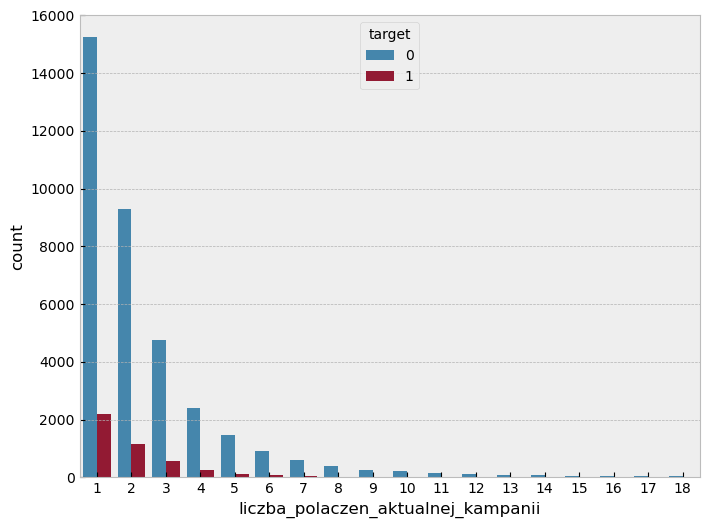

In [20]:
sns.countplot(
    data=df[df.liczba_polaczen_aktualnej_kampanii < 20],
    x="liczba_polaczen_aktualnej_kampanii",
    hue="target",
);

### liczba_dni_od_ost_kontaktu

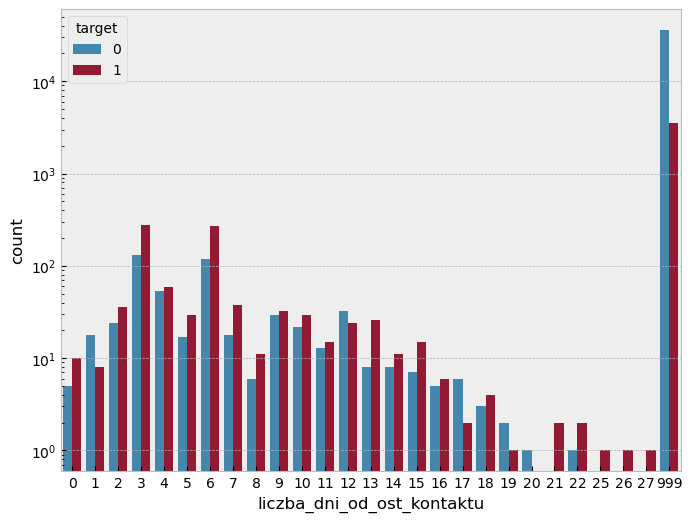

In [21]:
sns.countplot(data=df, x="liczba_dni_od_ost_kontaktu", hue="target")
plt.yscale("log")

#### Jako ze jest to skala logarytmiczna, moze sie wydawac ze roznica miedzy iloscia ludzi, ktorzy zdecydowali sie na depozyt, a tymi ktorzy sie na to nie zdecydowali, jest minimalna, jednak w rzeczywistosci jest ona bardzo duza.

In [22]:
df[df.liczba_dni_od_ost_kontaktu == 999].target.value_counts()

0    35605
1     3551
Name: target, dtype: int64

### WAZNE! Zastanowic sie co zrobic z tymi 999, czy zamienic je na pd.NA? Tutaj 999 oznacza, ze po prostu nie bylo wczesniejszego kontaktu z klientem, w sensie nie kontaktowano sie z nim w ramach poprzedniej kampanii, oraz jest to pierwsza kampania, w ktorej sie z nim kontaktujemy.

### liczba_polaczen_przed_aktualna_kampania

In [23]:
ctab = pd.crosstab(df.target, df.liczba_polaczen_przed_aktualna_kampania).T
ctab

target,0,1
liczba_polaczen_przed_aktualna_kampania,,
0,32079,3050
1,3548,913
2,386,327
3,82,121
4,30,31
5,5,13
6,2,2
7,1,0


In [24]:
ctab["%"] = ctab[1] / ctab.sum(axis=1) * 100

In [25]:
ctab

target,0,1,%
liczba_polaczen_przed_aktualna_kampania,,,
0,32079,3050,8.682285
1,3548,913,20.466263
2,386,327,45.862553
3,82,121,59.605911
4,30,31,50.819672
5,5,13,72.222222
6,2,2,50.000000
7,1,0,0.000000


<AxesSubplot:xlabel='liczba_polaczen_przed_aktualna_kampania', ylabel='count'>

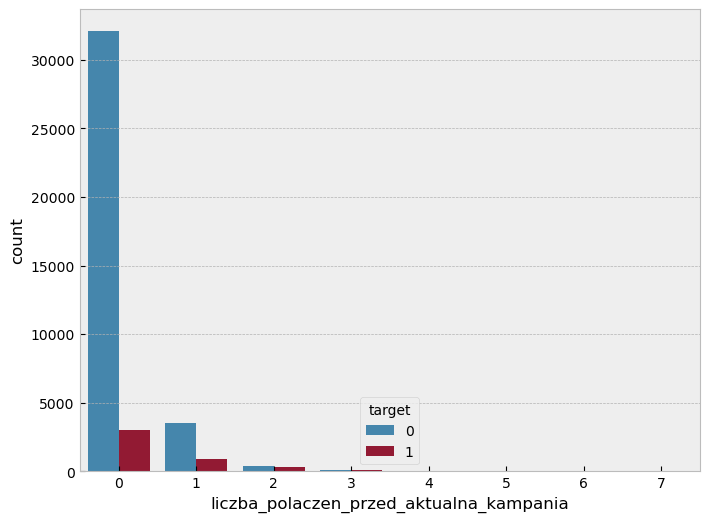

In [26]:
sns.countplot(data=df, x=df.liczba_polaczen_przed_aktualna_kampania, hue="target")

In [27]:
df = df[df.liczba_polaczen_przed_aktualna_kampania <= 3]

### Wspolczynniki rynkowe

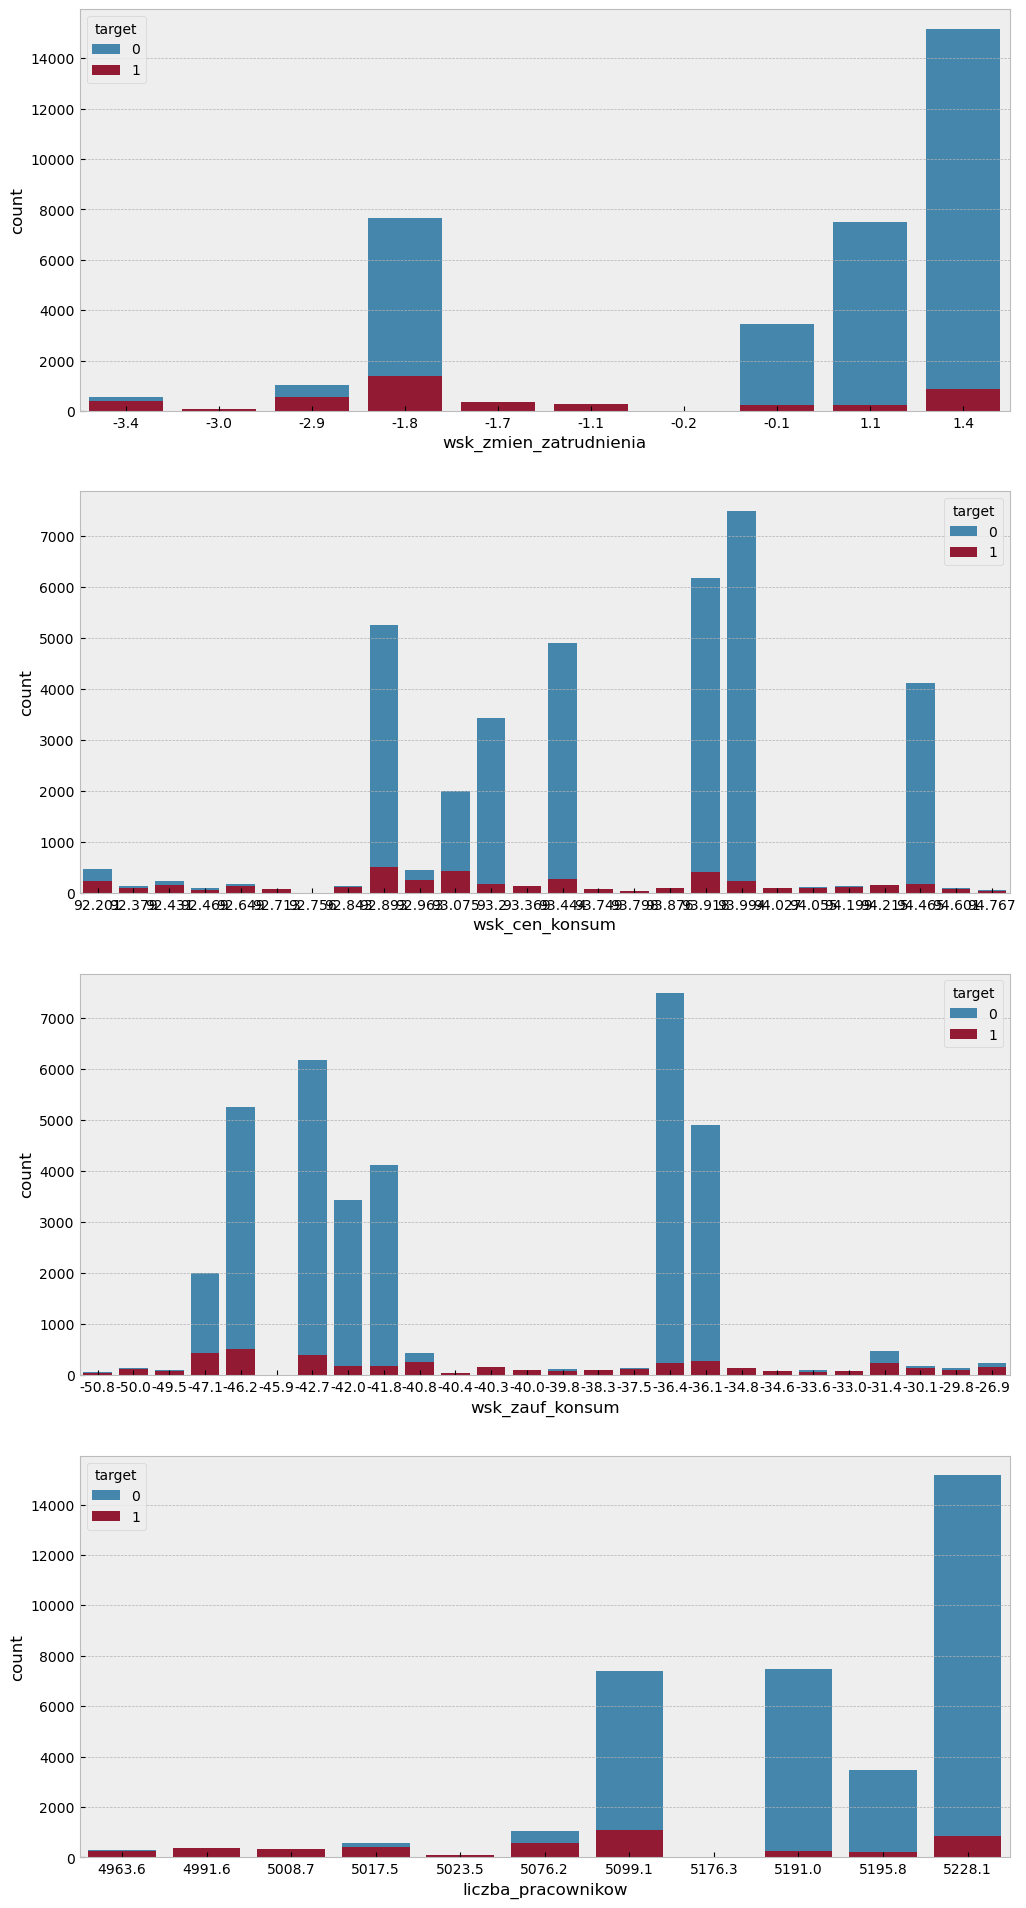

In [28]:
wspolczynniki = (
    "wsk_zmien_zatrudnienia",
    "wsk_cen_konsum",
    "wsk_zauf_konsum",
    "liczba_pracownikow",
)
fig, axs = plt.subplots(len(wspolczynniki), figsize=(12, 24), dpi=100)

for ind, wsp in enumerate(wspolczynniki):
    sns.countplot(
        data=df,
        x=df[wsp],
        ax=axs[ind],
        hue="target",
        dodge=False,
    )

### Spostrzeżenia
- Klienci z mniejszą liczbą pracowników statystycznie częściej zgadzali się na depozyt
- Klienci z ujemnym wskaźnikiem zmienności zatrudnienia chętniej zgadzali się na depozyt
- Oferta depozytu była głównie kierowana do osós z dużą liczba pracowników

In [29]:
pd.crosstab([df.liczba_pracownikow, df.wsk_zmien_zatrudnienia], df.target)

,target,0,1
liczba_pracownikow,wsk_zmien_zatrudnienia,,
4963.6,-1.1,295,269
4991.6,-1.7,339,355
5008.7,-1.8,252,320
5017.5,-3.4,570,411
5023.5,-3.0,75,79
5076.2,-2.9,1031,569
5099.1,-1.8,7401,1070
5176.3,-0.2,9,1
5191.0,1.1,7493,239


#### euribor3m

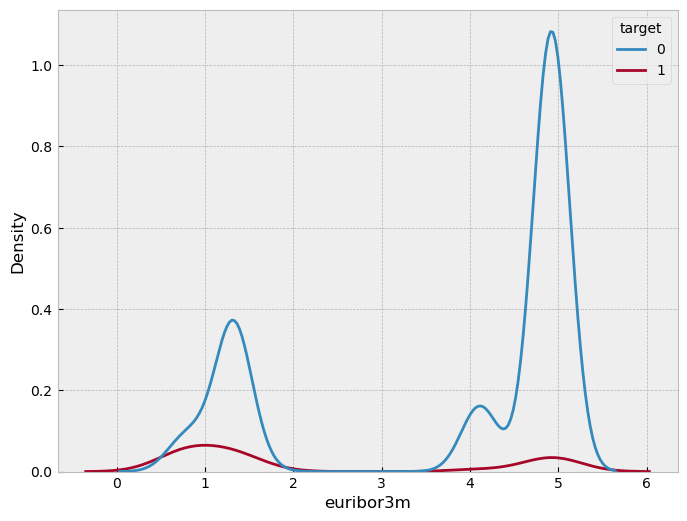

In [30]:
sns.kdeplot(
    data=df,
    x="euribor3m",
    hue="target",
);

#### Spostrzezenia
- Może się wydawać że dla wskaźnika euriborn najwięcej osób akceptowało oferte depozytu przy wartościach bliskich 1 i 5, lecz jest tylko iluzja spowodowana dużo większą liczbą ogólnych propozycji depozytu przeprowadzonych w tych czasach.

In [31]:
ctab = (
    pd.crosstab(df.euribor3m, df.target)
    .sort_values(by=[1, 0], ascending=False)
    .head(100)
)
ctab["%"] = ctab[1] / ctab.sum(axis=1) * 100
ctab = ctab.sort_values(by="%", ascending=False)

In [32]:
ctab

target,0,1,%
euribor3m,,,
0.697,1,14,93.333333
0.900,6,20,76.923077
0.652,8,26,76.470588
0.733,5,13,72.222222
0.655,10,23,69.696970
...,...,...,...
4.191,591,19,3.114754
4.153,670,19,2.757620
4.856,1177,32,2.646816


#### Spostrzeżenia
- Patrząc na posortowane wartości możemy stwierdzić, że najwięcej osób jest skłonnych do depozytu przy wartościach euroborn3m bliskich między 0.5 a 1.5

<AxesSubplot:xlabel='euribor3m', ylabel='%'>

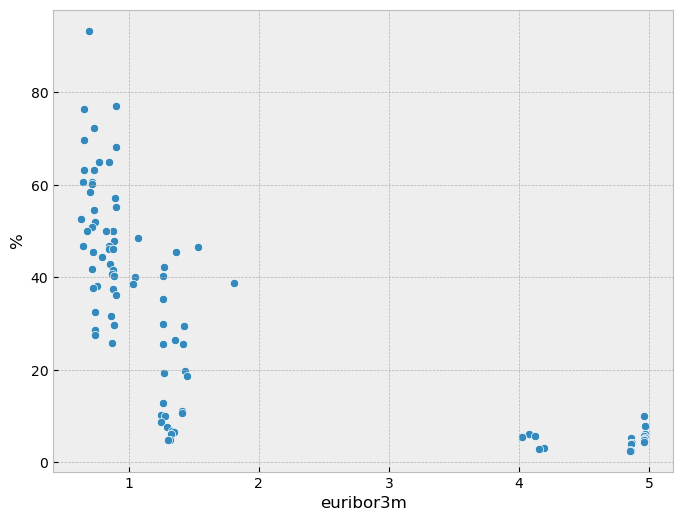

In [33]:
sns.scatterplot(data=ctab, x=ctab.index, y="%")

#### Im nizsza stopa procentowa, tym wiekszy % osob chce dokonac depozytu.

## Dane kategoryczne

W tej czesci skupimy sie na obserwacjach o wartosciach _unknown_.

In [34]:
subset = df.select_dtypes(include="object")

In [35]:
subset

,zawod,stan_cywilny,wyksztalcenie,ma_kredyt,kredyt_mieszkaniowy,ma_pozyczke,sposob_kontaktu,miesiac,day_of_week,wynik_poprzedniej_kampanii
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41169,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41170,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,success
41172,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41173,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent


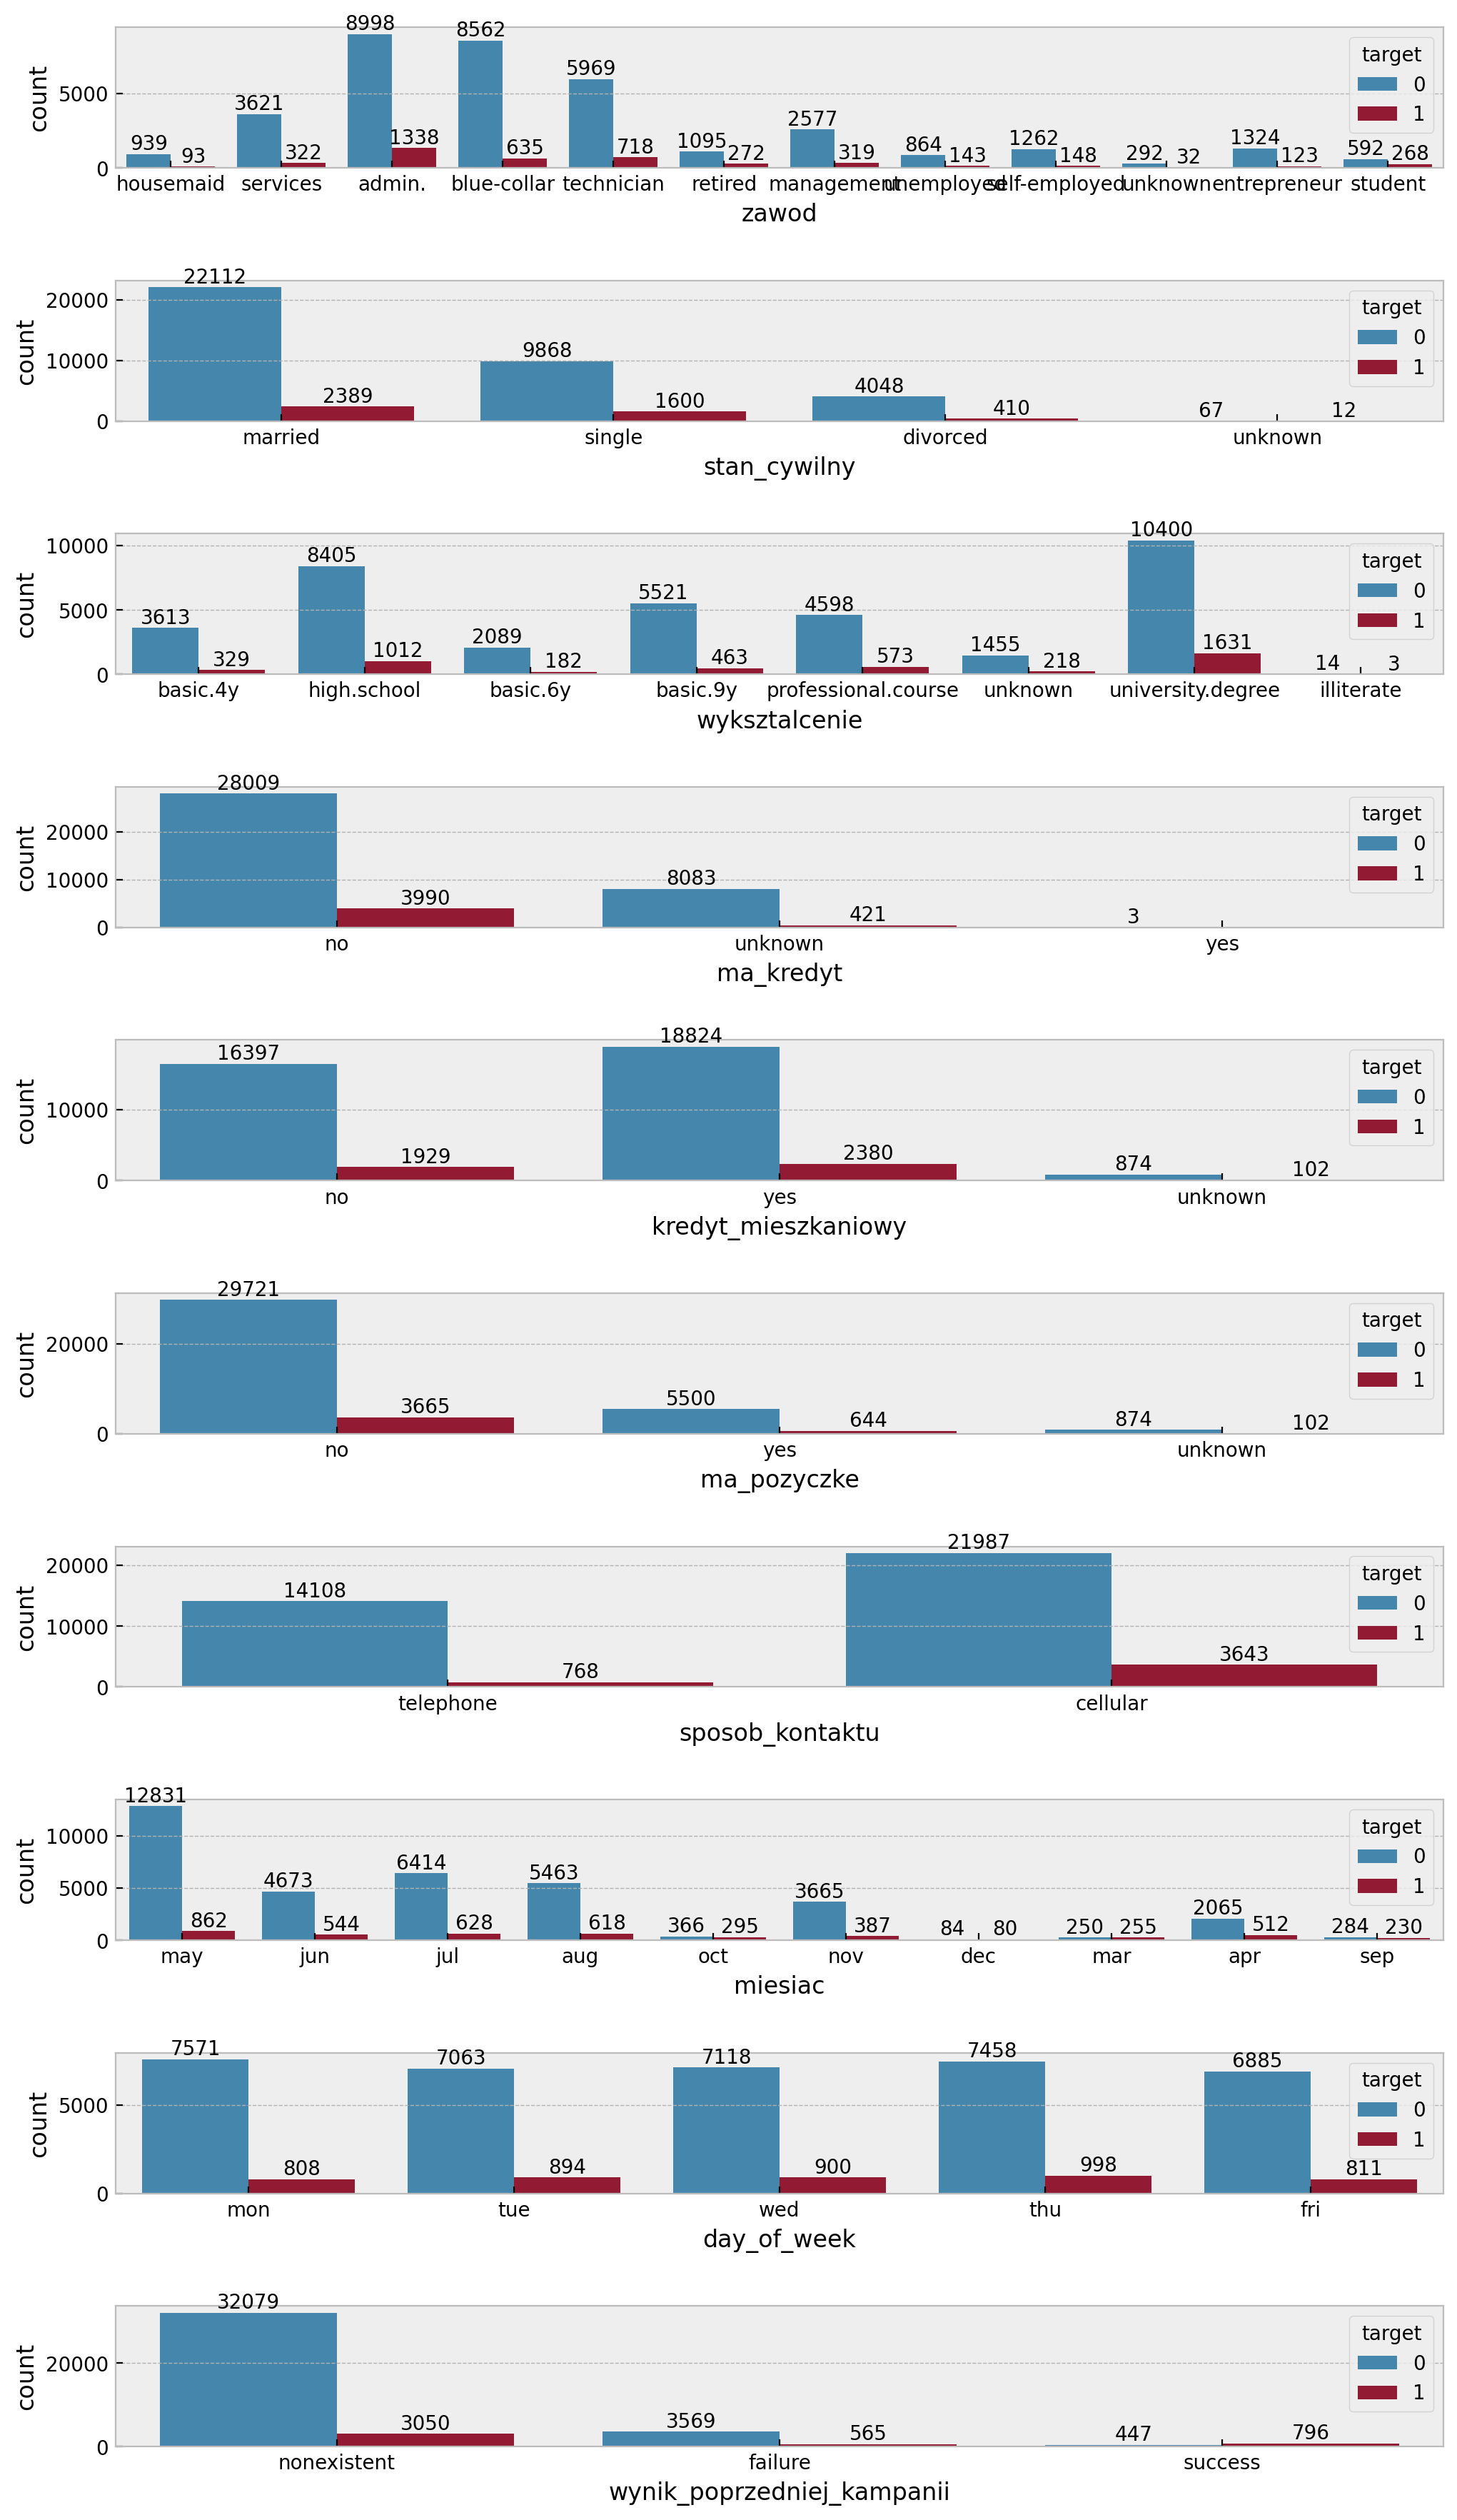

In [36]:
fig, axs = plt.subplots(len(subset.columns), dpi=200, figsize=(12, 22))

for ind, feature in enumerate(subset.columns):
    sns.countplot(data=df, x=df[feature], hue="target", ax=axs[ind], orient="h")
    axs[ind].bar_label(axs[ind].containers[0])
    axs[ind].bar_label(axs[ind].containers[1])
plt.subplots_adjust(hspace=0.8)

### Spostrzezenia
- Rezultaty (Akceptacja bądź nie oferty depozytu) dla rekordów z kolumną o wartości unknown nie odbiegają znacząco od reszty danych
- Dane z polem unknown stanowią małą grupę
- Ze względu na stosunkowo małą grupę i taki sam stosunek akceptacji oferty do odmowy dużym błędem nie byłoby kompletne pominięcię rekordów z polem unknown

### Ma_pozyczke, ma_kredyt, kredyt_mieszkaniowy

In [37]:
df = df[~(df.ma_pozyczke == "unknown")]
df = df[~(df.ma_kredyt == "unknown")]
df = df[~(df.kredyt_mieszkaniowy == "unknown")]

df.ma_kredyt = (df.ma_kredyt == "no") + 0
df.ma_pozyczke = (df.ma_pozyczke == "no") + 0
df.kredyt_mieszkaniowy = (df.kredyt_mieszkaniowy == "no") + 0

In [38]:
df.to_csv("data/cleaned.csv")